<a href="https://colab.research.google.com/github/peddlem25/lotto649/blob/master/2010_sept_2019Lotto649.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/JesseScott/Lotto649.git

fatal: destination path 'Lotto649' already exists and is not an empty directory.


In [0]:
import sys
import pandas as pd
import datetime as dt
import urllib.request
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [20]:
from google.colab import files
uploaded = files.upload()

Saving 6492010a.csv to 6492010a.csv


In [21]:
base_reader = pd.read_csv("6492010a.csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
1084,649,0,2019-09-07,25,28,37,38,42,48,34
1085,649,0,2019-09-11,2,4,27,36,45,49,41
1086,649,0,2019-09-14,6,13,28,29,35,43,25
1087,649,0,2019-09-18,3,10,15,23,45,47,9
1088,649,0,2019-09-21,1,2,4,32,38,39,21


In [22]:
columns = list(base_reader.loc[:,'NUMBER DRAWN 1':'NUMBER DRAWN 6'])
draws = base_reader[columns]

draws.tail()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
1084,25,28,37,38,42,48
1085,2,4,27,36,45,49
1086,6,13,28,29,35,43
1087,3,10,15,23,45,47
1088,1,2,4,32,38,39


In [24]:
# set
b1 = draws["NUMBER DRAWN 1"]

# describe
b1.describe()

count    1088.000000
mean        7.614890
std         6.028424
min         1.000000
25%         3.000000
50%         6.000000
75%        10.250000
max        33.000000
Name: NUMBER DRAWN 1, dtype: float64

In [25]:
# unique
b1vc = b1.value_counts()
b1vc.columns = ["value"]
b1vc

2     117
3     111
1     105
4     105
6      79
5      70
9      64
7      59
8      57
10     49
12     35
11     32
13     31
14     26
15     24
16     19
18     18
20     16
21     13
23     11
17     10
19      9
24      6
26      5
27      5
22      4
25      3
28      2
30      1
29      1
33      1
Name: NUMBER DRAWN 1, dtype: int64

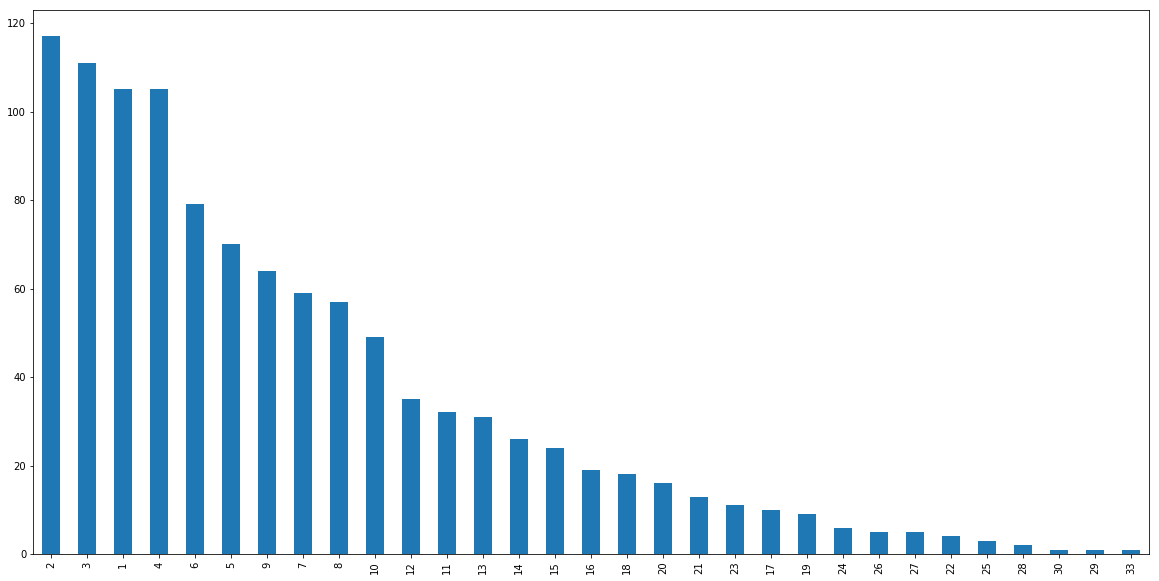

In [26]:
b1vc.plot(kind='bar')

In [28]:
b1vc_vals = b1vc.index
b1vc_vals


Int64Index([ 2,  3,  1,  4,  6,  5,  9,  7,  8, 10, 12, 11, 13, 14, 15, 16, 18,
            20, 21, 23, 17, 19, 24, 26, 27, 22, 25, 28, 30, 29, 33],
           dtype='int64')

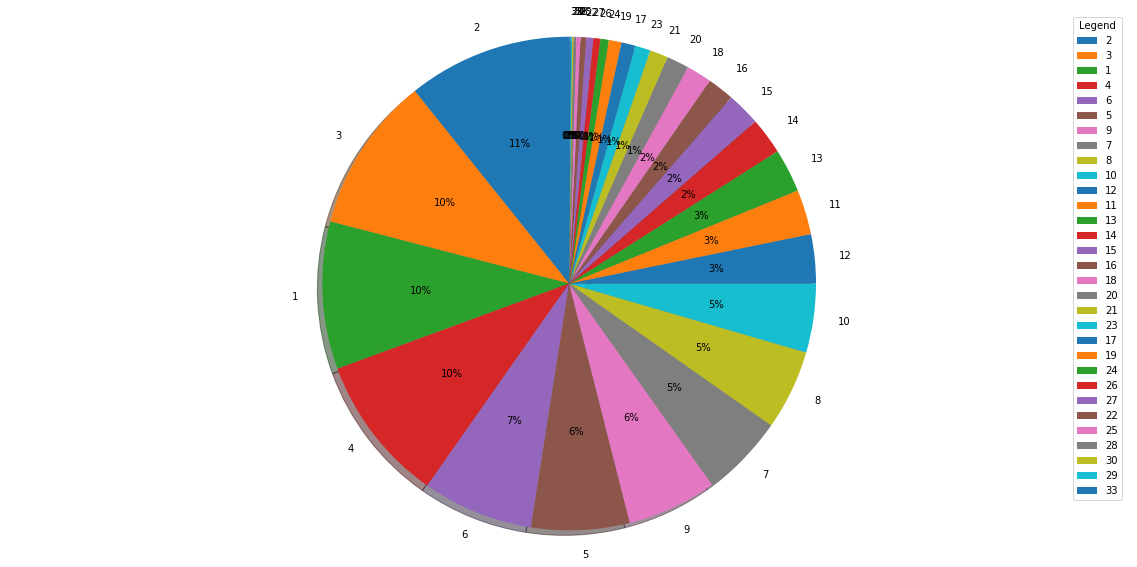

In [29]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b1vc, autopct='%1.0f%%', labels=b1vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#Validaton¶

It seems very odd to me that the most frequent numbers are the lowest numbers, so let's do a little bit of analysis in order to validate that i'm not doing something wrong...

In [30]:
# Filter Columns to Date and Ball #1
draw_dates_1_list = list(base_reader.loc[:,'DRAW DATE':'NUMBER DRAWN 1'])
draw_dates_1 = base_reader[draw_dates_1_list]
draw_dates_1.tail()

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
1084,2019-09-07,25
1085,2019-09-11,2
1086,2019-09-14,6
1087,2019-09-18,3
1088,2019-09-21,1


In [31]:
# Filter to 2018 Draws
draw_dates_1_2018 = draw_dates_1[(draw_dates_1['DRAW DATE'] > '2018-0-0')]
draw_dates_1_2018.head()

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
910,2018-01-03,3
911,2018-01-06,12
912,2018-01-10,9
913,2018-01-13,21
914,2018-01-17,6


In [32]:
# Filter to display all #1 draws during 2018
draw_dates_ball_one_number_one = draw_dates_1_2018[(draw_dates_1_2018['NUMBER DRAWN 1'] == 1)]
draw_dates_ball_one_number_one

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
918,2018-01-31,1
930,2018-03-14,1
932,2018-03-21,1
939,2018-04-14,1
963,2018-07-07,1
964,2018-07-11,1
987,2018-09-29,1
1010,2018-12-19,1
1016,2019-01-09,1


# Let's see what percent of the draws in 2018 are Ball #1

In [33]:
percent_ball_one = len(draw_dates_1_2018.index) / len(draw_dates_ball_one_number_one.index)
percent_ball_one

11.933333333333334

# This seems to match with our results from Cell 11... let's verify


# ball_one_number_one_list = list(base_reader.loc[:,'NUMBER DRAWN 1'])
# ball_one_number_one = base_reader[ball_one_number_one_list]
# ball_one_number_one



In [34]:
ball_one_number_one_draws = draws[(draws['NUMBER DRAWN 1'] == 1)]
ball_one_number_one_draws


percent_ball_one = len(draw_dates_1_2018.index) / len(ball_one_number_one_draws.index)
percent_ball_one

1.7047619047619047

#Ball 2

In [35]:
# set
b2 = draws["NUMBER DRAWN 2"]

# describe
b2.describe()

count    1088.000000
mean       14.522978
std         7.605343
min         2.000000
25%         8.000000
50%        13.000000
75%        20.000000
max        40.000000
Name: NUMBER DRAWN 2, dtype: float64

In [36]:
# unique
b2vc = b2.value_counts()
b2vc.columns = ["value"]
b2vc

8     66
10    63
7     59
12    57
15    56
13    55
11    55
16    51
9     46
17    44
14    40
5     40
21    39
6     36
19    36
4     33
20    32
18    32
22    30
3     28
24    25
23    25
25    21
29    19
28    19
2     14
26    14
27    13
31    10
30     8
32     7
35     5
34     3
37     2
39     1
33     1
36     1
38     1
40     1
Name: NUMBER DRAWN 2, dtype: int64

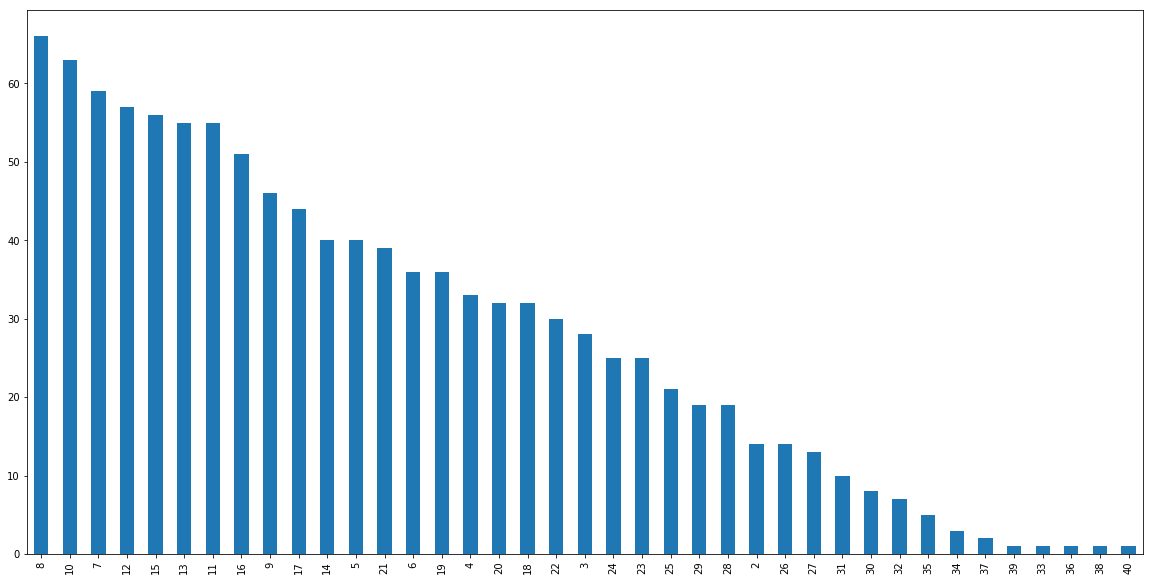

In [37]:
b2vc.plot(kind='bar')


In [38]:
b2vc_vals = b2vc.index
b2vc_vals

Int64Index([ 8, 10,  7, 12, 15, 13, 11, 16,  9, 17, 14,  5, 21,  6, 19,  4, 20,
            18, 22,  3, 24, 23, 25, 29, 28,  2, 26, 27, 31, 30, 32, 35, 34, 37,
            39, 33, 36, 38, 40],
           dtype='int64')

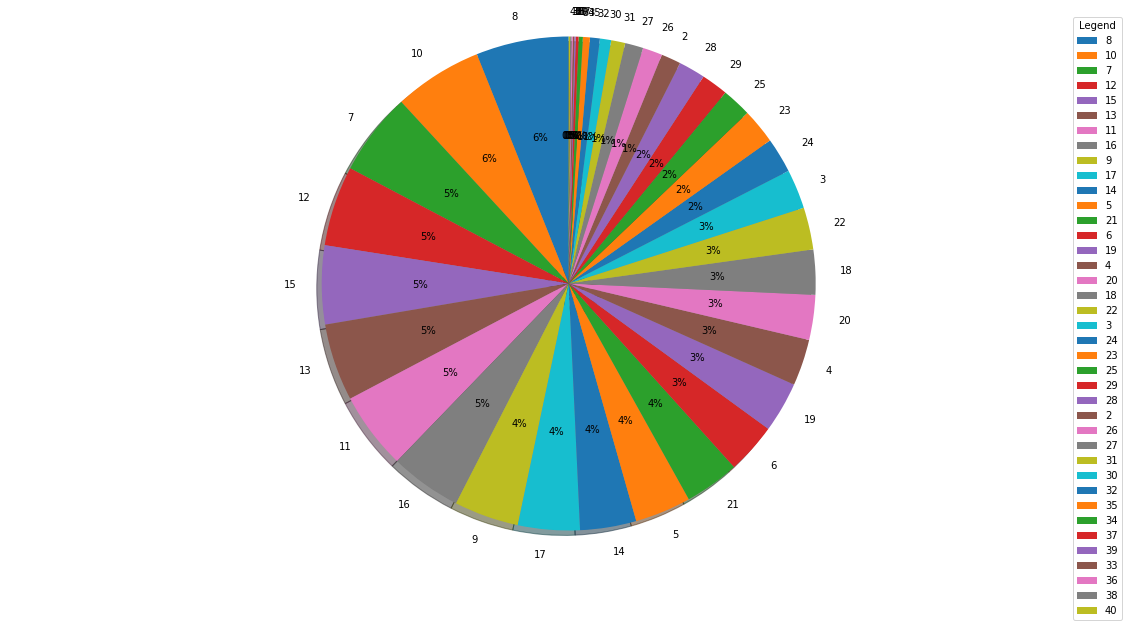

In [39]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b2vc, autopct='%1.0f%%', labels=b2vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#Ball 3

In [40]:
# set
b3 = draws["NUMBER DRAWN 3"]

# describe
b3.describe()

count    1088.000000
mean       21.758272
std         8.328105
min         3.000000
25%        15.000000
50%        22.000000
75%        28.000000
max        43.000000
Name: NUMBER DRAWN 3, dtype: float64

In [41]:
# unique
b3vc = b3.value_counts()
b3vc.columns = ["value"]
b3vc

22    57
15    52
24    51
17    51
21    49
23    46
16    42
20    42
25    42
18    41
19    41
28    38
27    38
11    35
14    32
26    32
30    32
31    29
12    28
13    28
10    28
32    27
33    27
29    25
9     24
34    22
36    19
35    17
7     16
37    14
8     12
6     10
38     9
41     8
5      6
40     5
39     5
42     3
4      3
43     1
3      1
Name: NUMBER DRAWN 3, dtype: int64

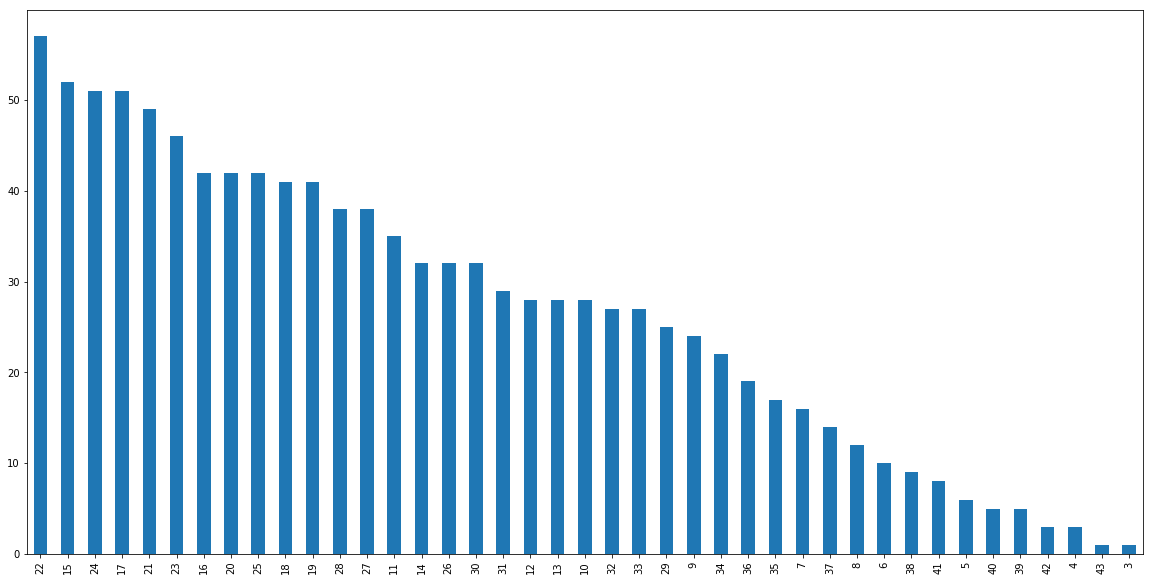

In [42]:
b3vc.plot(kind='bar')


In [43]:
b3vc_vals = b3vc.index
b3vc_vals

Int64Index([22, 15, 24, 17, 21, 23, 16, 20, 25, 18, 19, 28, 27, 11, 14, 26, 30,
            31, 12, 13, 10, 32, 33, 29,  9, 34, 36, 35,  7, 37,  8,  6, 38, 41,
             5, 40, 39, 42,  4, 43,  3],
           dtype='int64')

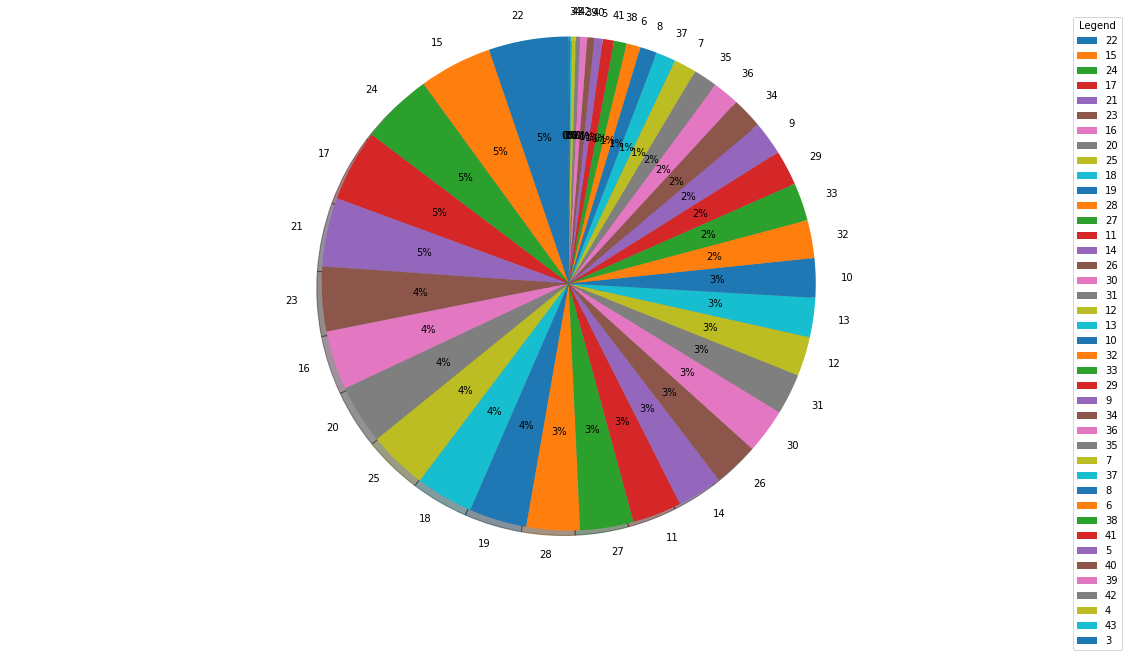

In [44]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b3vc, autopct='%1.0f%%', labels=b3vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#Ball 4

In [45]:
# set
b4 = draws["NUMBER DRAWN 4"]

# describe
b4.describe()

count    1088.000000
mean       28.583640
std         8.280412
min         4.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        46.000000
Name: NUMBER DRAWN 4, dtype: float64

In [46]:
# unique
b4vc = b4.value_counts()
b4vc.columns = ["value"]
b4vc

36    51
31    49
27    48
29    48
26    47
23    44
32    43
30    43
33    42
28    42
34    41
24    41
40    39
20    39
22    39
38    37
35    37
25    36
39    32
21    30
37    29
41    28
19    25
16    24
17    21
18    20
43    15
42    14
15    13
13    12
12    11
11    10
14     9
45     8
44     6
9      6
8      4
10     3
46     1
4      1
Name: NUMBER DRAWN 4, dtype: int64

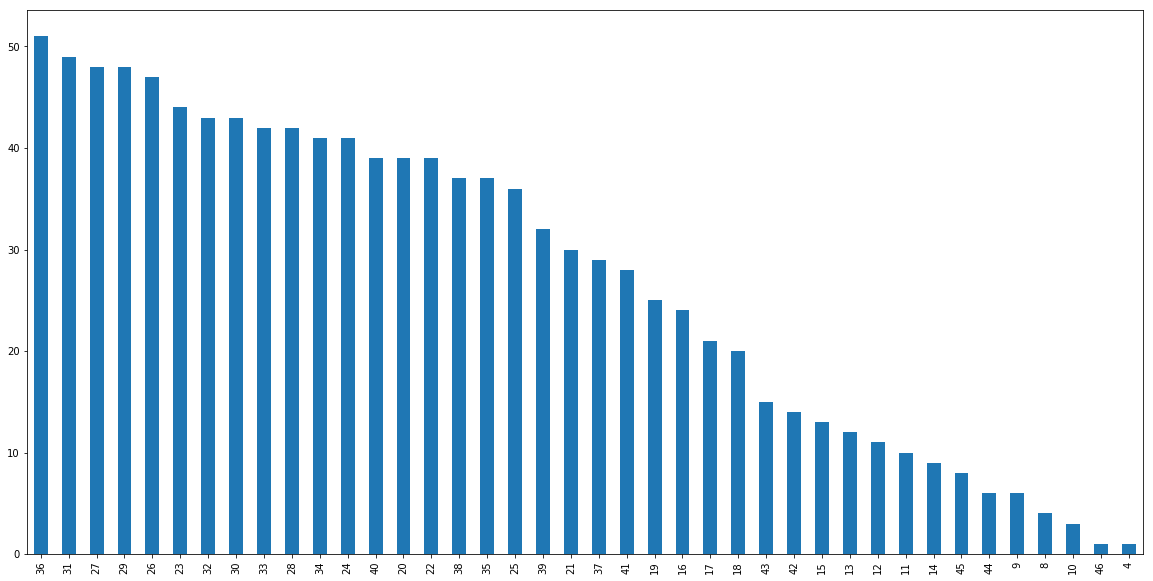

In [47]:
b4vc.plot(kind='bar')


In [48]:
b4vc_vals = b4vc.index
b4vc_vals

Int64Index([36, 31, 27, 29, 26, 23, 32, 30, 33, 28, 34, 24, 40, 20, 22, 38, 35,
            25, 39, 21, 37, 41, 19, 16, 17, 18, 43, 42, 15, 13, 12, 11, 14, 45,
            44,  9,  8, 10, 46,  4],
           dtype='int64')

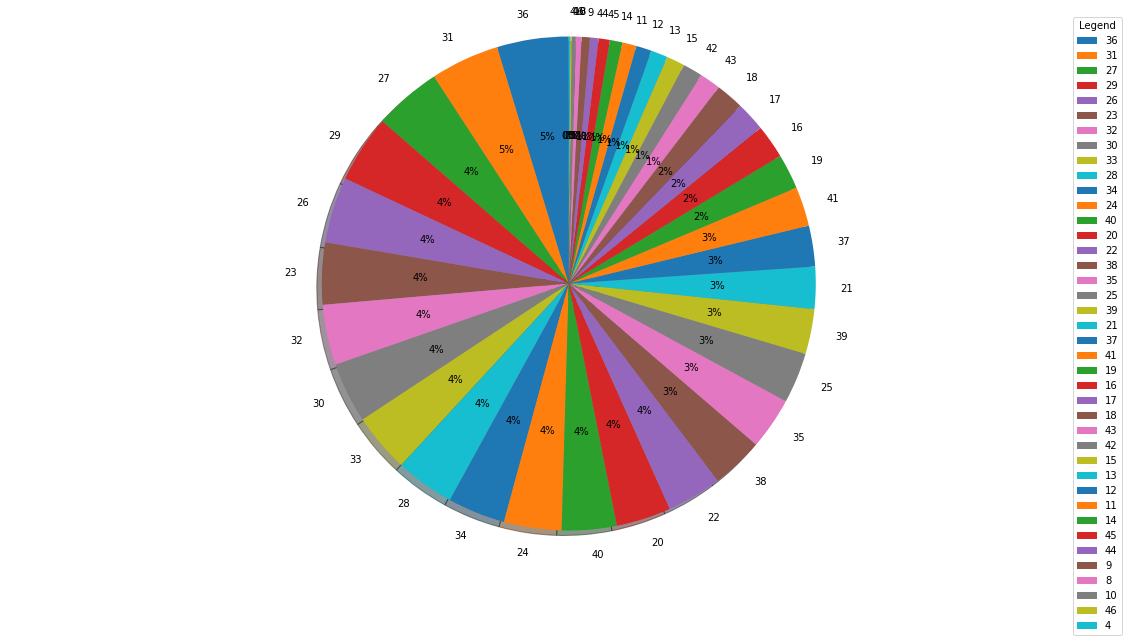

In [49]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b4vc, autopct='%1.0f%%', labels=b4vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#Ball 5




In [50]:
# set
b5 = draws["NUMBER DRAWN 5"]

# describe
b5.describe()

count    1088.000000
mean       35.942096
std         7.559841
min        11.000000
25%        31.000000
50%        37.000000
75%        42.000000
max        48.000000
Name: NUMBER DRAWN 5, dtype: float64

In [51]:
# unique
b5vc = b5.value_counts()
b5vc.columns = ["value"]
b5vc

38    75
41    68
37    57
40    56
42    54
35    53
45    52
44    52
34    47
33    46
36    44
43    44
39    43
46    37
31    37
28    34
47    29
27    27
30    27
32    26
26    23
29    21
21    19
25    19
24    18
48    17
23    14
22    13
20    10
19     7
18     6
17     4
12     3
14     2
13     2
16     1
11     1
Name: NUMBER DRAWN 5, dtype: int64

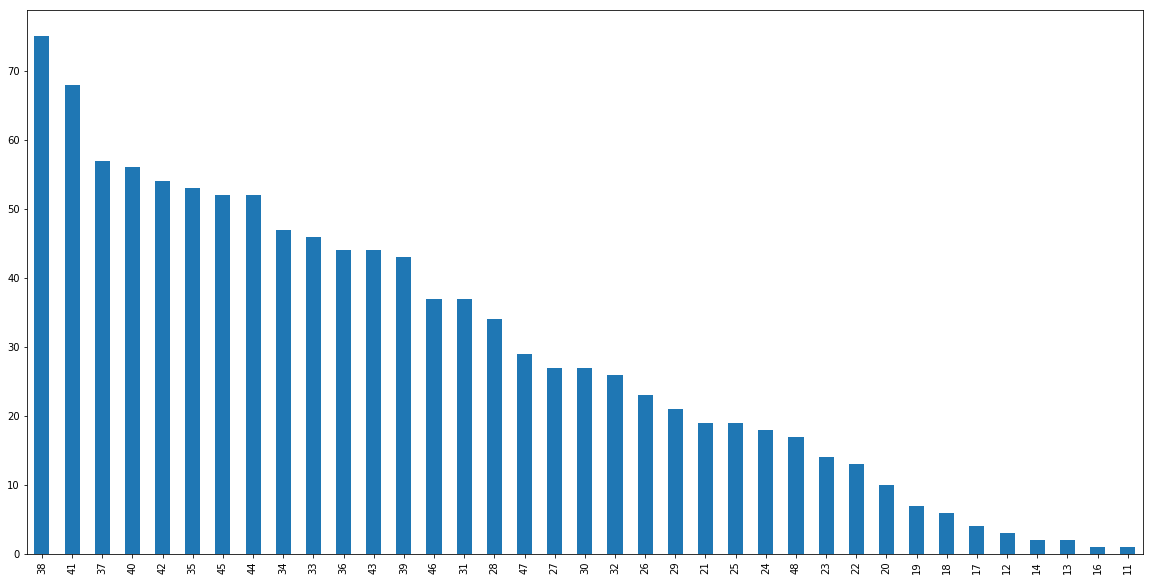

In [52]:
b5vc.plot(kind='bar')


In [53]:
b5vc_vals = b5vc.index
b5vc_vals

Int64Index([38, 41, 37, 40, 42, 35, 45, 44, 34, 33, 36, 43, 39, 46, 31, 28, 47,
            27, 30, 32, 26, 29, 21, 25, 24, 48, 23, 22, 20, 19, 18, 17, 12, 14,
            13, 16, 11],
           dtype='int64')

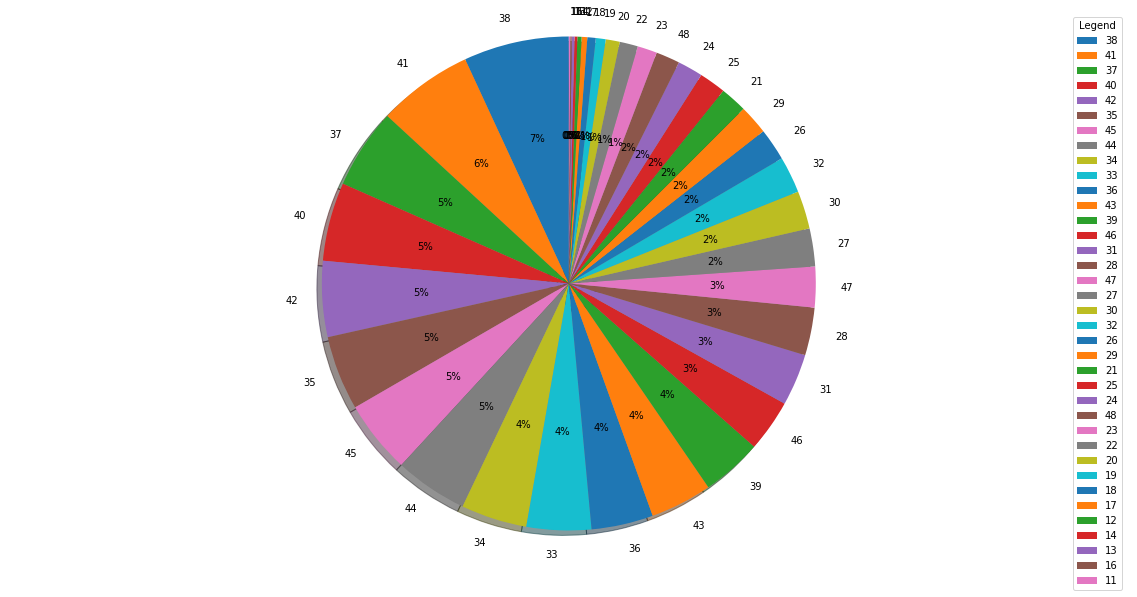

In [54]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b5vc, autopct='%1.0f%%', labels=b5vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#Ball 6

In [55]:
# set
b6 = draws["NUMBER DRAWN 6"]

# describe
b6.describe()

count    1088.000000
mean       42.857537
std         5.834810
min        19.000000
25%        40.000000
50%        44.500000
75%        47.000000
max        49.000000
Name: NUMBER DRAWN 6, dtype: float64

In [56]:
# unique
b6vc = b6.value_counts()
b6vc.columns = ["value"]
b6vc

49    128
48    127
47    107
46     94
45     88
44     84
43     69
42     57
40     42
39     41
41     40
38     31
36     29
37     23
33     21
35     16
31     15
34     14
32     10
30      8
29      8
28      8
27      8
26      6
24      5
23      4
20      2
25      1
21      1
19      1
Name: NUMBER DRAWN 6, dtype: int64

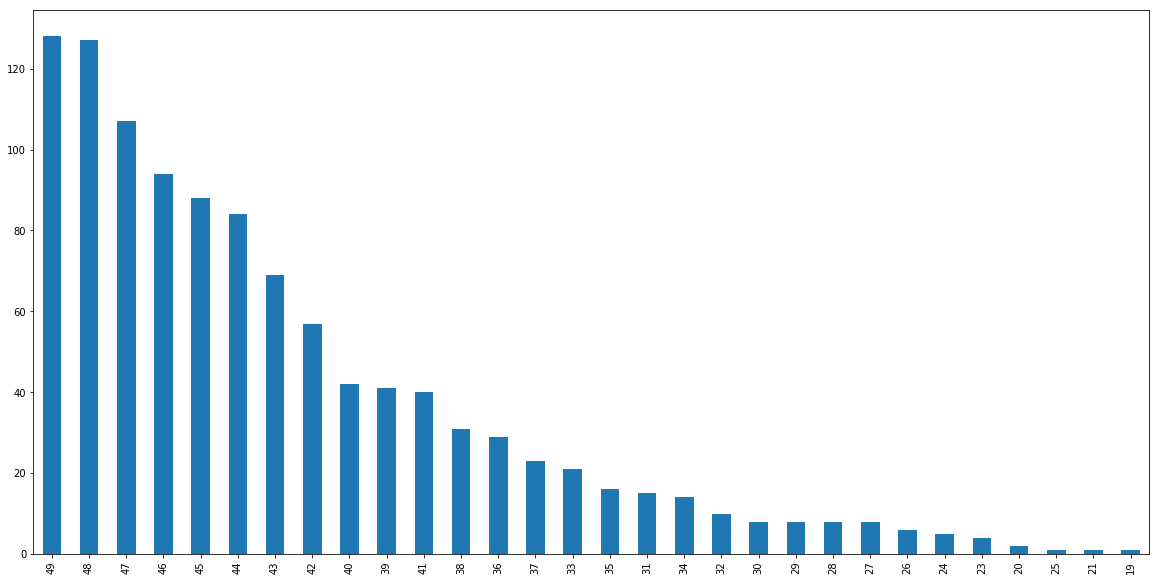

In [57]:
b6vc.plot(kind='bar')


In [58]:
b6vc_vals = b6vc.index
b6vc_vals

Int64Index([49, 48, 47, 46, 45, 44, 43, 42, 40, 39, 41, 38, 36, 37, 33, 35, 31,
            34, 32, 30, 29, 28, 27, 26, 24, 23, 20, 25, 21, 19],
           dtype='int64')

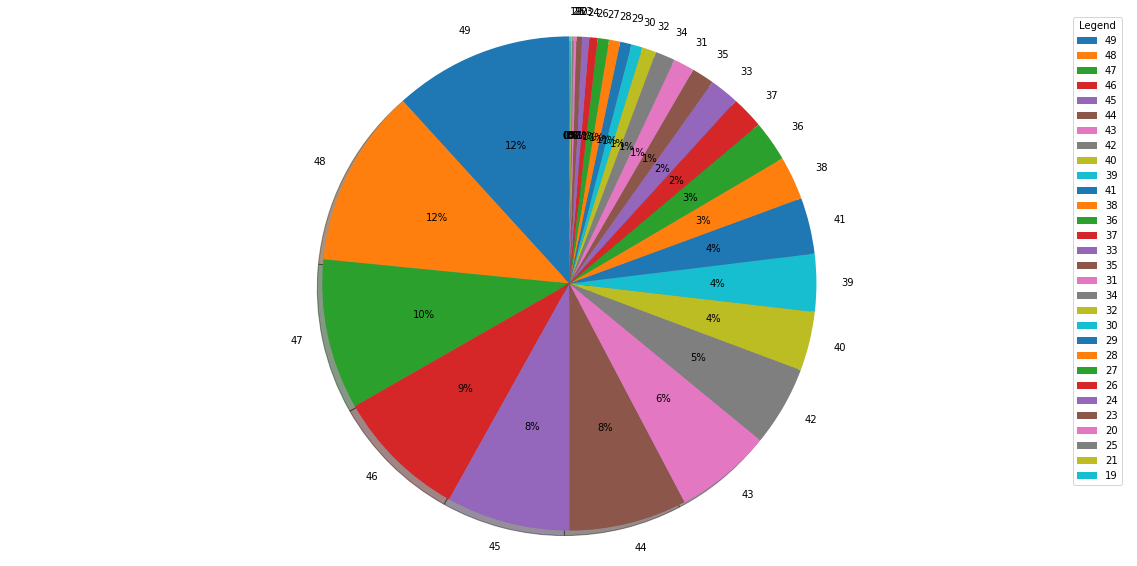

In [59]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b6vc, autopct='%1.0f%%', labels=b6vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#MAX NUMBERS

In [60]:
total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for %s is the number %s at %s times" % (draws.columns[index], str(val.name), str(val.item())) )

Most drawn number for NUMBER DRAWN 1 is the number 2 at 117 times
Most drawn number for NUMBER DRAWN 2 is the number 8 at 66 times
Most drawn number for NUMBER DRAWN 3 is the number 22 at 57 times
Most drawn number for NUMBER DRAWN 4 is the number 36 at 51 times
Most drawn number for NUMBER DRAWN 5 is the number 38 at 75 times
Most drawn number for NUMBER DRAWN 6 is the number 49 at 128 times


In [61]:
total_counts


[2, 8, 22, 36, 38, 49]

In [62]:
total_values


[117, 66, 57, 51, 75, 128]

In [0]:
index = ['Ball 1','Ball 2','Ball 3','Ball 4','Ball 5','Ball 6']
count = 'number chosen'
value = 'times chosen'
columns = [count,value]
df = pd.DataFrame(index=index, columns=columns)
df[count] = total_counts
df[value] = total_values

In [64]:
df

,number chosen,times chosen
Ball 1,2,117
Ball 2,8,66
Ball 3,22,57
Ball 4,36,51
Ball 5,38,75
Ball 6,49,128
